<a href="https://colab.research.google.com/github/azimjaan21/Fashion-Image-Classifier-Sequential-API-/blob/main/Image_Classifier_(Sequential_API_%2B_FASHION_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

#tf.__version__
#keras.__version__

# Keras to Load the Dataset

In [8]:
#We use Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist

#Spliting to Train / Test set
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
#So, now creating Validation Set

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
# Fashion MNIST, we need the list of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[3]]

'Ankle boot'

# Creating the Model Using the Sequential API

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [26]:
weights

array([[ 0.03433593, -0.03924555, -0.06220323, ..., -0.01632553,
         0.00823918, -0.03204574],
       [ 0.01399515,  0.02825409, -0.0139182 , ...,  0.02531341,
         0.0677671 ,  0.03973973],
       [ 0.0221111 ,  0.05041794, -0.03797873, ..., -0.02012179,
         0.06715719, -0.05906571],
       ...,
       [-0.02669813, -0.00822607, -0.07407564, ..., -0.06427276,
        -0.06943192,  0.01728664],
       [ 0.04636755, -0.05476921,  0.00813646, ..., -0.00563645,
        -0.0691357 , -0.01405333],
       [ 0.07395446,  0.0602857 , -0.05062499, ...,  0.00968681,
         0.04698649, -0.03351538]], dtype=float32)

In [28]:
biases.shape

(300,)

# Compiling the Model

In [29]:
#After a model is created, we must call its compile() method to specify the loss function and the optimizer to use.

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Training and Evaluating the Model

# Visualization


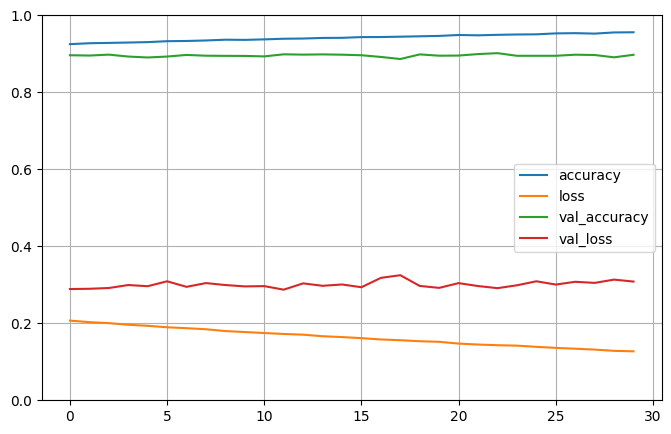

In [33]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # for vertical range [0 -1]
plt.show()

In [35]:
#To prevent from OVERFITTING -> EarlyStopping()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_model = model.fit(X_train, y_train, epochs=100, #We can still use higher epochs...
                          validation_data=(X_valid, y_valid),
                          callbacks =[early_stopping],
                          batch_size=32
                          )

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9596 - loss: 0.1153 - val_accuracy: 0.8980 - val_loss: 0.3310
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1113 - val_accuracy: 0.8942 - val_loss: 0.3194
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9624 - loss: 0.1104 - val_accuracy: 0.8966 - val_loss: 0.3301
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9621 - loss: 0.1092 - val_accuracy: 0.8918 - val_loss: 0.3340
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9621 - loss: 0.1082 - val_accuracy: 0.9016 - val_loss: 0.3106
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9653 - loss: 0.1042 - val_accuracy: 0.8980 - val_loss: 0.3262
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9626 - loss: 0.1047 - val_accuracy: 0.8996 - val_loss: 0.3172
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9653 - loss: 0

We can see above that there is overfitting after epochs=10, So training was stopped to prevent from **OverFitting**

In [36]:
#Model Evaluating

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8425 - loss: 90.0416


[93.63018035888672, 0.8411999940872192]

# Using the Model to Make Predictions

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


array([9, 2, 1])

In [42]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Saving the Model

In [47]:
model.save("my_keras_model.keras")

In [48]:
from google.colab import files

files.download('my_keras_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deployment



> Convert the Keras Model to TensorFlow Lite Format



In [51]:
import tensorflow as tf

model = tf.keras.models.load_model("my_keras_model.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("fashion_classifier.tflite", 'wb') as f:
  f.write(tflite_model)

  # DOWNLOAD the TFLite model to our local
  from google.colab import files
  files.download('fashion_classifier.tflite')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saved artifact at '/tmp/tmp0kk23hlk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137019724855632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137019724852112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137018853150384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137018853152672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137022407583776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137019650586608: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>